# K-means classification

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [7]:
# --- 1. Load train set ---
train = pd.read_parquet("train.parquet")  # Path as needed

# --- 2. Select only numeric features (exclude IDs, label) ---
top_features = [
    "X752", "X759", "X444", "X758", "X445",   # SHAP
    "X778", "X750", "X345", "X466",           # MI
    "X614", "X610"                            # Perm
]
top_features = list(dict.fromkeys(top_features))
X = train[top_features]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. Run KMeans ---
n_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# === 4. PCA for 2D Plotting ===
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

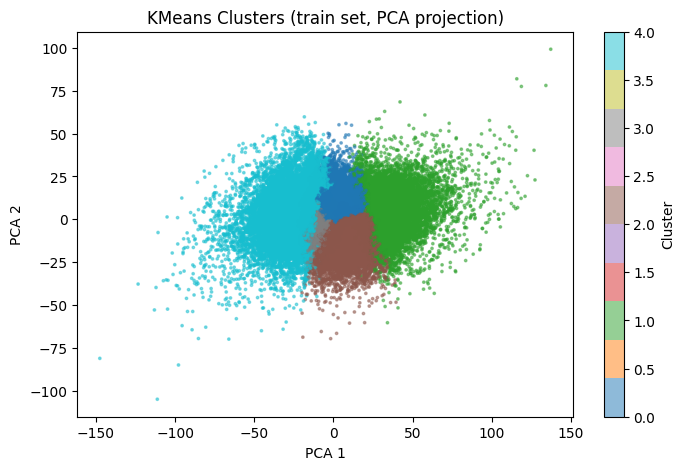

In [ ]:

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="tab10", s=3, alpha=0.5)
plt.title("KMeans Clusters (train set, PCA projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_cols)
print("\nCluster centroids (standardized):")
print(centroids)

if 'label' in train.columns:
    label_means = train.groupby('cluster')['label'].mean()
    print("\nMean label per cluster:")
    print(label_means)


Cluster centroids (standardized):
    bid_qty   ask_qty   buy_qty  sell_qty    volume        X1        X2  \
0  0.020451  0.042375 -0.077633 -0.145733 -0.117231 -0.630893 -0.340251   
1 -0.290307 -0.252483  1.759923  1.378123  1.644071 -0.696815 -0.065544   
2 -0.185907 -0.194788 -0.045583 -0.002447 -0.025083  0.107664  0.172579   
3  0.122578  0.108623 -0.190549 -0.150726 -0.178803  0.436724  0.190310   
4 -0.215749 -0.235017  0.753577  0.948487  0.892607  0.511874  0.065760   

         X3        X4        X5  ...      X771      X772      X773      X774  \
0 -0.491971 -0.571253 -0.623655  ...  0.044915 -0.009657 -0.014799  0.129017   
1 -0.185208 -0.291987 -0.400830  ... -0.389669  0.178937  0.165351 -0.442125   
2  0.225032  0.245621  0.248867  ... -0.233135 -0.062235 -0.021765 -0.256916   
3  0.284589  0.337889  0.377619  ...  0.156559  0.000867 -0.012393  0.122427   
4  0.155977  0.222004  0.287990  ... -0.374680  0.116025  0.123287 -0.489312   

       X775      X776      X777  